# Plan

## The Issue:
- Why are customers churning?

## Project goals:
- Find drivers of customer churn at Telco
- Construct a ML classification model that accurately predicts customer churn


## The data science pipeline process:
- Acquire the data
- Prepare and clean data
- Explore 
- Model & Evaluate
- Recommendataions

## Highlights:
- Multiple drivers of churn:
  - contract type: month to month
  - No online security
  - No tech support
  - Internet service type: Fiber Optic
  - Monthly charges
- Logistic Model predicts churn accurately 77.8% of the time. This is better than our baseline of 73.5%.




# Acquire

**We will start by importing the necessary libraries**

In [1]:
# imports
import pandas as pd
import numpy as np
import os
from scipy import stats

# visualize
import seaborn as sns
import matplotlib.pyplot as plt


# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")


# acquire
from env import host, user, password
from pydataset import data


#skelearn imports
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression





# docs
import acquire
import prepare



**Acquiring Dataset:**
- We acquired the telco data by using a function created in the acquire.py file.

In [2]:
#Acquiring telco data from our SQL servers. 

telco = acquire.get_telco_data()

*Let's verify we imported the correct data*
- We will look at the first 5 values of the data.

In [3]:
telco.head() # Looking at first five values of dataframe

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


- We will analyze the shape (amount of rows and columns).

In [4]:
# Looking at rows and columns
telco.shape

(7043, 24)

- The datatypes are listed below using the .info function.

In [5]:
telco.info() # Looking at datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

- The list of statistics for the data using .describe function

In [6]:
telco.describe() # Looking at statistics for telco dataframe

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692
std,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


- The column list in list format.

In [7]:
telco.columns.tolist() # looking at list of columns

['payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

**Made a quick visual of overall churn. As you can see more customers are staying than leaving.**

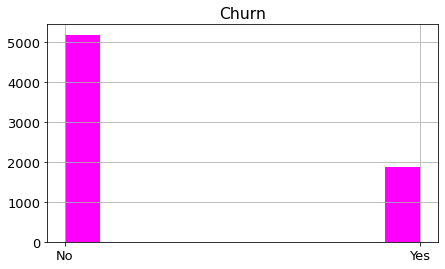

In [8]:
# Visual for overall churn and no churn
telco['churn'].hist(color='magenta', figsize=(7,4))

plt.title('Churn')
plt.show()

## Takeways from Acquire:
    - As you can see from the chart above more customers stay than leave
    - Over 1,500 customers are churning out of 7043
    - We will need to clean all of columns with the object datatype except for customer ID (there no value in changing this as it will not give us any valuable information)

# Prepare

- Check dataframe for any null values and find there are no null values in dataframe

In [9]:
telco.isnull().sum() # looking to see if there are any null values in dataframe

payment_type_id             0
internet_service_type_id    0
contract_type_id            0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
internet_service_type       0
payment_type                0
dtype: int64

- We do see there are empty values in the total charges column and code below is showing all empty columns from total charges column

In [10]:
telco[telco['total_charges'] == ' '] # Looking at which columns in total charges that is empty

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
85,4,1,3,1371-DWPAZ,Female,0,Yes,Yes,0,No,...,Yes,Yes,No,No,56.05,,No,Two year,DSL,Credit card (automatic)
156,3,1,3,2775-SEFEE,Male,0,No,Yes,0,Yes,...,Yes,No,No,Yes,61.90,,No,Two year,DSL,Bank transfer (automatic)
236,2,1,3,4075-WKNIU,Female,0,Yes,Yes,0,Yes,...,Yes,Yes,No,No,73.35,,No,Two year,DSL,Mailed check
255,3,1,3,4472-LVYGI,Female,0,Yes,Yes,0,No,...,Yes,Yes,No,Yes,52.55,,No,Two year,DSL,Bank transfer (automatic)
339,2,1,3,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,...,No,Yes,Yes,No,80.85,,No,Two year,DSL,Mailed check
5681,2,3,3,2520-SGTTA,Female,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,20.00,,No,Two year,None,Mailed check
5717,2,3,3,3115-CZMZD,Male,0,No,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,20.25,,No,Two year,None,Mailed check
5727,2,3,3,3213-VVOLG,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,25.35,,No,Two year,None,Mailed check
5798,2,3,3,4367-NUYAO,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,25.75,,No,Two year,None,Mailed check
6007,2,3,3,7644-OMVMY,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,19.85,,No,Two year,None,Mailed check


- How do we clean this? 
  - I used a clean_data function from the prepare.py file created. This function cleans the total charges column by filling the empty values with zeros and then converting it to a float data type.

In [11]:
# Cleaning total charges column by adding zeros to empty values and changing data type to float using function from 
#prepare file
clean_df= prepare.clean_data(telco)

- In code below we are looking at first 5 values of dataframe before implementing the next function to be able to compare if necessary.

In [12]:
#Looking at dataframe before implementing prep_telco_data function from prepare.py file
clean_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.90,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.10,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.40,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.20,No,Two year,DSL,Bank transfer (automatic)


- Using the for loop with if condition below we are looking at each unique value for all of the columns with object datatype except for customer id.
- This will be useful to look at to ensure we didn't lose any data along the way as we perform our upcoming stats test and modeling.

In [13]:
#Looking at all unique values for each column that is an object except for the first index
for col in telco.columns:
    obj_list= list(telco.select_dtypes('object').columns)[1:]
    if col in obj_list:
            print(f'\n {col}')
            print(telco[col].value_counts())
    


 gender
Male      3555
Female    3488
Name: gender, dtype: int64

 partner
No     3641
Yes    3402
Name: partner, dtype: int64

 dependents
No     4933
Yes    2110
Name: dependents, dtype: int64

 phone_service
Yes    6361
No      682
Name: phone_service, dtype: int64

 multiple_lines
No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64

 online_security
No                     3498
Yes                    2019
No internet service    1526
Name: online_security, dtype: int64

 online_backup
No                     3088
Yes                    2429
No internet service    1526
Name: online_backup, dtype: int64

 device_protection
No                     3095
Yes                    2422
No internet service    1526
Name: device_protection, dtype: int64

 tech_support
No                     3473
Yes                    2044
No internet service    1526
Name: tech_support, dtype: int64

 streaming_tv
No                     2810
Yes           

**Cleaning, separating, and changing datatypes of all object columns using prep_telco_data function from prepare.py file**

In [14]:
#Cleaning, separating, and changing datatypes of all object columns using prep_telco_data function from prepare.py file
clean_df= prepare.prep_telco_data(clean_df)

- Looking at first 5 values from  the newly created dataframe with all object columns changed datatype to numeric

In [15]:
#Looking at first 5 values from  the newly created dataframe with all object columns changed datatype to numeric
clean_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,0,0,1,1,0,0,0,0,0,1
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,0,0,1,1,0,0,0,1,0,0
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,0,0,1,1,0,0,1,0,0,0
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,0,0,1,1,0,0,0,1,0,0
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,0,0,1,1,0,0,1,0,0,0


# Takeaways:
- Cleaned total charges that had empty columns
- Changed all object datatypes to a numeric datatype using prep_telco function from prepare.py file
- Now that all data is cleaned and prepped we can explore it.

# Explore

- Creating correlation table using corr_telco_data function from prepare.py file

In [16]:
# Creating correlation table using corr_telco_data function from prepare.py file
corr_df= prepare.corr_telco_data(clean_df)

- Looking at first 5 values of correlation dataframe

In [17]:
corr_df.sort_values(by="churn_No") #sorting values to see which values has the most correlation

,index,churn_No,churn_Yes
40,churn_Yes,-1,1
41,contract_type_Month-to-month,-0.405103,0.405103
19,online_security_No,-0.342637,0.342637
28,tech_support_No,-0.337281,0.337281
45,internet_service_type_Fiber optic,-0.30802,0.30802
49,payment_type_Electronic check,-0.301919,0.301919
22,online_backup_No,-0.268005,0.268005
25,device_protection_No,-0.252481,0.252481
6,monthly_charges,-0.193356,0.193356
38,paperless_billing_Yes,-0.191825,0.191825


## Stats test

In [18]:
alpha = .05 # defining alpha value

## Hypothesis 1:
- H0: contract month to month has no affect on customers who churn  (they are independent)
    
- Ha: contract month to month has an affect on customers who churn  (they are dependent)

In [19]:
clean_df['contract_type_Month-to-month'].value_counts() # Looking at value counts to make sure didn't lose anything

1    3875
0    3168
Name: contract_type_Month-to-month, dtype: int64

In [20]:
#Performing chi^2 test
contract_m2m_crosstab= pd.crosstab(clean_df['contract_type_Month-to-month'], clean_df['churn_Yes'])

contract_m2m_crosstab

churn_Yes,0,1
contract_type_Month-to-month,,
0,2954,214
1,2220,1655


In [21]:
chi, p, degf, expected= stats.chi2_contingency(contract_m2m_crosstab)

In [22]:
chi, p, degf, expected

(1153.9716611093477,
 6.147585925549194e-253,
 1,
 array([[2327.30824933,  840.69175067],
        [2846.69175067, 1028.30824933]]))

In [23]:
print('Observed\n')
print(contract_m2m_crosstab.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi:.4f}')
print(f'p     = {p:.4f}')

Observed

[[2954  214]
 [2220 1655]]
---
Expected

[[2327  840]
 [2846 1028]]
---

chi^2 = 1153.9717
p     = 0.0000


In [24]:
#Deciding
null_hypothesis = "Contract month to month makes no difference in churn (they are independent)"

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


## Hypothesis 2:
- H0: contract month to month has no affect on customers who have not churn  (they are independent)
    
- Ha: contract month to month has an affect on customers who have notchurn  (they are dependent)

In [25]:
#Performing chi^2 test
contract_m2m_crosstab_nc= pd.crosstab(clean_df['contract_type_Month-to-month'], clean_df['churn_No'])

contract_m2m_crosstab_nc

churn_No,0,1
contract_type_Month-to-month,,
0,214,2954
1,1655,2220


In [26]:
chi2, p2, degf2, expected2= stats.chi2_contingency(contract_m2m_crosstab_nc)

In [27]:
chi2, p2, degf2, expected2

(1153.9716611093477,
 6.147585925549194e-253,
 1,
 array([[ 840.69175067, 2327.30824933],
        [1028.30824933, 2846.69175067]]))

In [28]:
print('Observed\n')
print(contract_m2m_crosstab_nc.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p2:.4f}')

Observed

[[ 214 2954]
 [1655 2220]]
---
Expected

[[2327  840]
 [2846 1028]]
---

chi^2 = 1153.9717
p     = 0.0000


In [29]:
#Deciding
null_hypothesis = "Contract month to month has no affect on customers who do not churn  (they are independent)"

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


**Here is a visualization: a histogram showing the relationship between customers who have left the company that are month to month contracts which is over 1,600 customers.**

Text(0, 0.5, 'Churned')

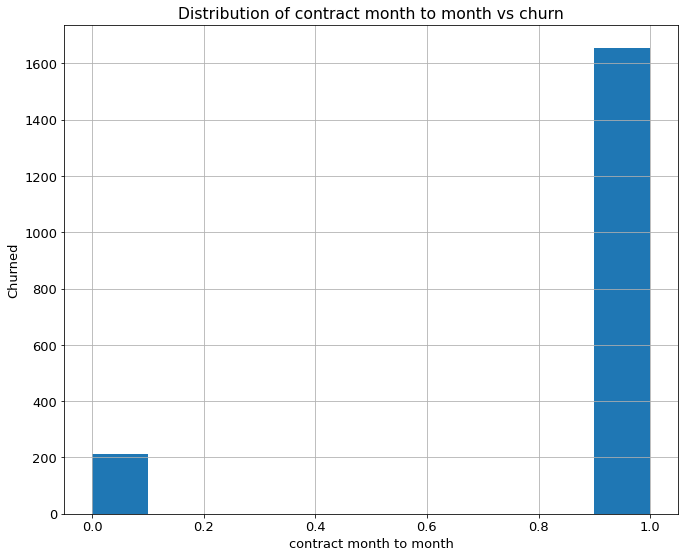

In [30]:
#Histogram of customers who have churned in month to month contract
m2m_contract = clean_df[clean_df.churn == 'Yes']['contract_type_Month-to-month']

m2m_contract.hist()


plt.title('Distribution of contract month to month vs churn')
plt.xlabel('contract month to month')
plt.ylabel('Churned')

**Here is a visualization: A histogram showing the relationship between customers who have stayed with the company that are month to month contracts which is over 2000 customers.**

Text(0, 0.5, 'No Churn')

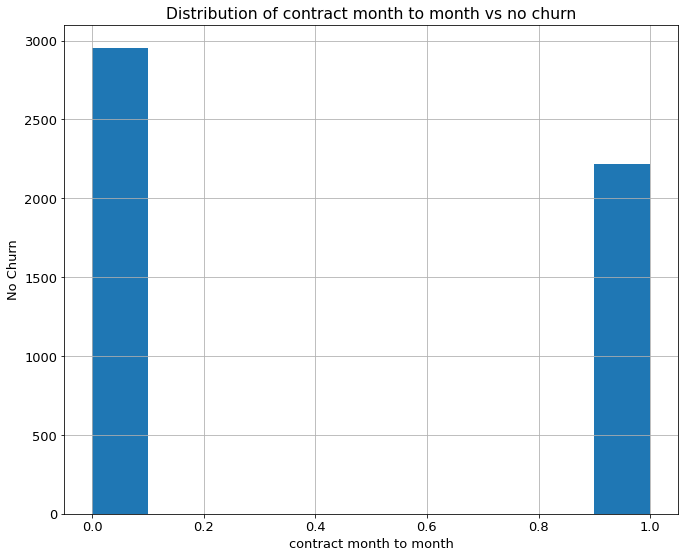

In [35]:
#Histogram of customers who have not churned in month to month contract
m2m_contract = clean_df[clean_df.churn == 'No']['contract_type_Month-to-month']

m2m_contract.hist()

plt.title('Distribution of contract month to month vs no churn')
plt.xlabel('contract month to month')
plt.ylabel('No Churn')

**In this chart it shows the relationship between customers who have churned and monthly charges. As you can see more customers pay $75 or more a month.**

Text(0, 0.5, 'Churned')

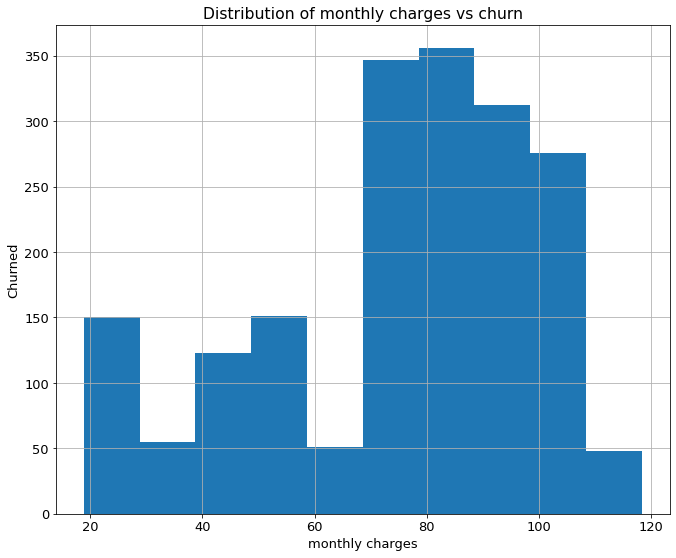

In [32]:
# histogram of churned customers with monthly charges
churn_sample = clean_df[clean_df.churn == 'Yes'].monthly_charges

churn_sample.hist()

plt.title('Distribution of monthly charges vs churn')
plt.xlabel('monthly charges')
plt.ylabel('Churned')

**In this chart it shows the relationship between customers who have not churned and monthly charges. As you can see more customers pay $25 or more a month.**

Text(0, 0.5, 'No Churned')

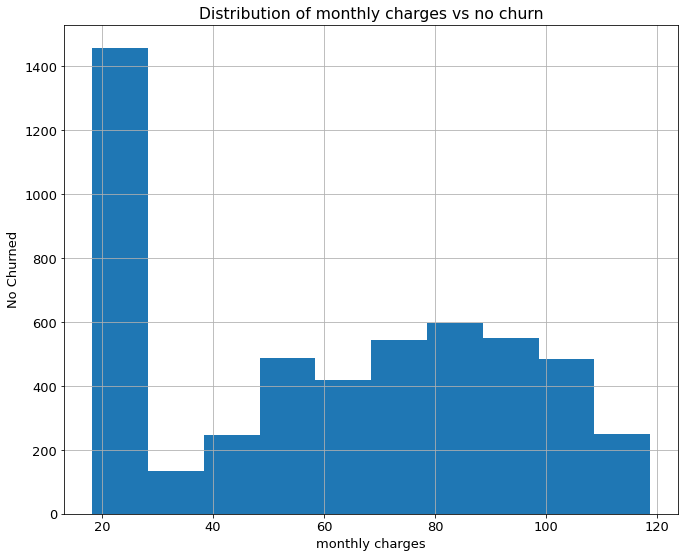

In [34]:
# histogram of non-churned customers with monthly charges

no_churn_sample = clean_df[clean_df.churn == 'No'].monthly_charges

no_churn_sample.hist()

plt.title('Distribution of monthly charges vs no churn')
plt.xlabel('monthly charges')
plt.ylabel('No Churned')

In [33]:
#Changing churn column datatype to numeric instead of string & return dataframe with only numeric values using clean_churn function from prepare.py file
prepare.clean_churn(clean_df)

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges,churn,gender_Female,gender_Male,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,2,1,3,0,65,90.45,5957.90,0,1,0,...,0,0,1,1,0,0,0,0,0,1
1,4,1,3,0,54,45.20,2460.55,0,0,1,...,0,0,1,1,0,0,0,1,0,0
2,3,1,3,0,56,45.05,2560.10,0,1,0,...,0,0,1,1,0,0,1,0,0,0
3,4,1,3,0,20,39.40,825.40,0,0,1,...,0,0,1,1,0,0,0,1,0,0
4,3,1,3,0,72,85.15,6316.20,0,0,1,...,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,3,1,0,1,20.05,20.05,0,1,0,...,1,0,0,0,0,1,0,0,0,1
7039,2,3,1,0,19,19.90,367.55,0,1,0,...,1,0,0,0,0,1,0,0,0,1
7040,4,3,1,0,6,19.70,129.55,0,1,0,...,1,0,0,0,0,1,0,1,0,0
7041,2,3,1,0,1,18.90,18.90,0,0,1,...,1,0,0,0,0,1,0,0,0,1


# Takeways:
- contract type month to month is not independent for customers who have stayed and customers who have left. 
- More customers are staying than leaving but a large amount is coming from contract type month to month customers.
- according to our visuals contract month to month customers who are churning are paying more monthly than customers who are not.


> - **Hypothesis 1 -** I rejected the Null Hypothesis; there is a difference.
> - alpha = .05
> - $H_0$: contract month to month has no affect on customers who churn(they are independent). 
> - $H_a$: contract month to month has an affect on customers who churn  (they are dependent). 

> - **Hypothesis 2 -** I rejected the Null Hypothesis; there is a difference.
> - alpha = .05
> - $H_0$: contract month to month has no affect on customers who do not churn  (they are independent).
> - $H_a$: contract month to month has an affect on customers who do not churn  (they are dependent).



# Model and Evaluate

**Make train, validate, and test datasets for modeling. I used the function telco_split from prepare.py to perform this action**

In [34]:
train, validate, test= prepare.telco_split(clean_df)

In [35]:
y_col = 'churn'

X_train, y_train = train.drop(columns= ['churn_Yes', 'churn_No', 'tenure']), train[y_col]
X_validate, y_validate = validate.drop(columns= ['churn_Yes', 'churn_No', 'tenure']), validate[y_col]
X_test, y_test = test.drop(columns= ['churn_Yes', 'churn_No','tenure']), test[y_col]

## Baseline Model

**Created a Baseline Model**

In [36]:
clean_df['churn'].value_counts() #Looking at what has the highest value_counts

0    5174
1    1869
Name: churn, dtype: int64

**baseline prediction = 0 (No churn), choosing 0 as baseline because it is the highest value**

In [37]:
# 1. Create the object
baseline = DummyClassifier(strategy='constant', constant=0)
# 2. Fit the object
baseline.fit(X_train, y_train)
# how does it do on training data set?
print('Baseline accuracy: %.4f' % baseline.score(X_train, y_train))

Baseline accuracy: 0.7347


# Decision Tree Model

**Decision Model 1**

In [38]:
#Model with hyperparameter of max_depth 3
#Create the object:
tree = DecisionTreeClassifier(max_depth=3, random_state=254)

#specify features we're using
ft = ['contract_type_Month-to-month', 'online_security_No','tech_support_No','internet_service_type_Fiber optic', 'monthly_charges']


#Fit it
tree.fit(X_train[ft], y_train)

DecisionTreeClassifier(max_depth=3, random_state=254)

In [39]:
print(f'training score: {tree.score(X_train[ft], y_train):.2%}')
print(f'validate score: {tree.score(X_validate[ft], y_validate):.2%}')

training score: 77.48%
validate score: 78.12%


**Decision Tree Model 2**

In [40]:
#Model with max_depth set to 2

#Create the object
tree2 = DecisionTreeClassifier(max_depth= 2, random_state=254,  max_features= 4)

#specify features we're using
ft = ['contract_type_Month-to-month', 'online_security_No','tech_support_No','internet_service_type_Fiber optic', 'monthly_charges']

#Fit it
tree2.fit(X_train[ft], y_train)

DecisionTreeClassifier(max_depth=2, max_features=4, random_state=254)

In [41]:
print(f'training score: {tree2.score(X_train[ft], y_train):.2%}')
print(f'validate score: {tree2.score(X_validate[ft], y_validate):.2%}')

training score: 76.06%
validate score: 76.94%


**Decision Tree Model 3**

In [42]:
#Model 3 with max_depth set to 2
tree3 = DecisionTreeClassifier(max_depth= 3, random_state=254,  max_features= 3)
tree3.fit(X_train[ft], y_train)

DecisionTreeClassifier(max_depth=3, max_features=3, random_state=254)

In [43]:
print(f'training score: {tree3.score(X_train[ft], y_train):.2%}')
print(f'validate score: {tree3.score(X_validate[ft], y_validate):.2%}')

training score: 76.59%
validate score: 77.17%


**Decision Tree Model 4**

In [44]:
#Model 4 with max_depth set to 2 and max_features set to 2
tree4 = DecisionTreeClassifier(max_depth= 3, random_state=254,  max_features= 2)
tree4 .fit(X_train[ft], y_train)

DecisionTreeClassifier(max_depth=3, max_features=2, random_state=254)

In [45]:
print(f'training score: {tree4.score(X_train[ft], y_train):.2%}')
print(f'validate score: {tree4.score(X_validate[ft], y_validate):.2%}')

training score: 77.48%
validate score: 78.12%


## 

## Logistic Regression Model

**Logistic Regression Model 1**

In [46]:
# Model 1
# Create the logistic regression object
logit = LogisticRegression(random_state=254)

# specify features we're using
ft = ['contract_type_Month-to-month', 'online_security_No','tech_support_No','internet_service_type_Fiber optic', 'monthly_charges']


# Fit a model
logit.fit(X_train[ft], y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred = logit.predict(X_train[ft])


In [47]:
print(f'training score: {logit.score(X_train[ft], y_train):.2%}')
print(f'validate score: {logit.score(X_validate[ft], y_validate):.2%}')

training score: 78.16%
validate score: 78.18%


In [48]:
#Looking at test score 
print(f'test score: {logit.score(X_test[ft], y_test):.2%}')

test score: 77.79%


**Logistic Regression Model 2**

In [49]:
# Model 2
# Create the logistic regression object
logit2= LogisticRegression(random_state=254, class_weight='balanced')

# specify features we're using
ft = ['contract_type_Month-to-month', 'online_security_No','tech_support_No','internet_service_type_Fiber optic', 'monthly_charges']


# Fit a model
logit2.fit(X_train[ft], y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred2 = logit.predict(X_train[ft])


In [50]:
print(f'training score: {logit2.score(X_train[ft], y_train):.2%}')
print(f'validate score: {logit2.score(X_validate[ft], y_validate):.2%}')

training score: 73.09%
validate score: 72.68%


**Logistic Regression Model 3**

In [51]:
# Model 3
# Create the logistic regression object
logit3= LogisticRegression(random_state=254, class_weight={0:40, 1:60})

# specify features we're using
ft = ['contract_type_Month-to-month', 'online_security_No','tech_support_No','internet_service_type_Fiber optic', 'monthly_charges']


# Fit a model
logit3.fit(X_train[ft], y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred3 = logit.predict(X_train[ft])

In [52]:
print(f'training score: {logit3.score(X_train[ft], y_train):.2%}')
print(f'validate score: {logit3.score(X_validate[ft], y_validate):.2%}')

training score: 75.25%
validate score: 74.87%


# KNN Model

In [53]:
#Create the object
knn = KNeighborsClassifier()

# specify features we're using
ft = ['contract_type_Month-to-month', 'online_security_No','tech_support_No','internet_service_type_Fiber optic', 'monthly_charges']


# Fit a model
knn.fit(X_train[ft], y_train)

# Evaluate the model
pred = knn.predict(X_train[ft])

In [54]:
print(f'training score: {knn.score(X_train[ft], y_train):.2%}')
print(f'validate score: {knn.score(X_validate[ft], y_validate):.2%}')

training score: 82.42%
validate score: 74.99%


In [55]:
#Create the object
knn2 = KNeighborsClassifier(n_neighbors= 3)

# specify features we're using
ft = ['contract_type_Month-to-month', 'online_security_No','tech_support_No','internet_service_type_Fiber optic', 'monthly_charges']


# Fit a model
knn2.fit(X_train[ft], y_train)

# Evaluate the model
pred = knn2.predict(X_train[ft])

In [56]:
print(f'training score: {knn2.score(X_train[ft], y_train):.2%}')
print(f'validate score: {knn2.score(X_validate[ft], y_validate):.2%}')

training score: 84.00%
validate score: 74.10%


## Takeways:
- Decision Tree has a good accuracy score for the train and validate data but Logistic regression model has higher accuracy score
- Knn has the highest training accuracy score but the validate score is fairly different. KNN model is overfitted for the training model.
- Logistic regression model 1 is best model in terms of accuracy.
- Logistic Model 1 is better than baseline but with more time I would continue to work with this model to improve the accuracy score

## CSV File

- Create the Predictions CSV
- Create a CSV file with probability of class, prediction of churn (1=churn, 0=not_churn)

**Created probability test using X_test**

In [57]:
probability_test = logit.predict_proba(X_test[ft])

probability_test_prediction = logit.predict(X_test[ft])

**Creating classifier**
- Assuming our target is (0,1), then the classifier would output a probability matrix of dimension (N,2). The first index refers to the probability that the data belong to class 0, and the second refers to the probability that the data belong to class 1.

In [58]:
probability_df = pd.DataFrame(probability_test, columns=logit.classes_.tolist())
probability_df.head()

,0,1
0,0.935698,0.064302
1,0.587199,0.412801
2,0.838053,0.161947
3,0.889261,0.110739
4,0.586810,0.413190


**Use reset_index() to reset the index of the DataFrame, and use the default one instead.**

In [59]:
reset_test = test.reset_index()
reset_test.head()

,index,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,2789,3,2,3,8670-ERCJH,Male,0,No,No,72,...,0,0,1,0,1,0,1,0,0,0
1,1233,3,1,1,0356-ERHVT,Male,0,Yes,No,11,...,1,0,0,1,0,0,1,0,0,0
2,6784,2,3,1,4786-UKSNZ,Male,0,No,No,1,...,1,0,0,0,0,1,0,0,0,1
3,3177,1,2,2,5945-AZYHT,Male,0,Yes,No,71,...,0,1,0,0,1,0,0,0,1,0
4,1740,2,1,1,4432-ADRLB,Male,0,No,No,2,...,1,0,0,1,0,0,0,0,0,1


**Combine probability dataframe and reset_test dataframe**

In [60]:
test_probability_df = pd.concat([reset_test, probability_df], axis=1)
test_probability_df.head()

,index,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,0,1
0,2789,3,2,3,8670-ERCJH,Male,0,No,No,72,...,1,0,1,0,1,0,0,0,0.935698,0.064302
1,1233,3,1,1,0356-ERHVT,Male,0,Yes,No,11,...,0,1,0,0,1,0,0,0,0.587199,0.412801
2,6784,2,3,1,4786-UKSNZ,Male,0,No,No,1,...,0,0,0,1,0,0,0,1,0.838053,0.161947
3,3177,1,2,2,5945-AZYHT,Male,0,Yes,No,71,...,0,0,1,0,0,0,1,0,0.889261,0.110739
4,1740,2,1,1,4432-ADRLB,Male,0,No,No,2,...,0,1,0,0,0,0,0,1,0.586810,0.413190


**Creating prediction column using the probability_test_prediction created above**

In [61]:
test_probability_df['predicted'] = probability_test_prediction
test_probability_df.head()

,index,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,0,1,predicted
0,2789,3,2,3,8670-ERCJH,Male,0,No,No,72,...,0,1,0,1,0,0,0,0.935698,0.064302,0
1,1233,3,1,1,0356-ERHVT,Male,0,Yes,No,11,...,1,0,0,1,0,0,0,0.587199,0.412801,0
2,6784,2,3,1,4786-UKSNZ,Male,0,No,No,1,...,0,0,1,0,0,0,1,0.838053,0.161947,0
3,3177,1,2,2,5945-AZYHT,Male,0,Yes,No,71,...,0,1,0,0,0,1,0,0.889261,0.110739,0
4,1740,2,1,1,4432-ADRLB,Male,0,No,No,2,...,1,0,0,0,0,0,1,0.586810,0.413190,0


**From the test_probability_df created we are filtering to only customer_id, predicted, and churn columns**

In [62]:
csv_df = test_probability_df[['customer_id', 'predicted', 'churn']]
csv_df.head()

,customer_id,predicted,churn
0,8670-ERCJH,0,0
1,0356-ERHVT,0,0
2,4786-UKSNZ,0,1
3,5945-AZYHT,0,0
4,4432-ADRLB,0,1


In [63]:
# Write DataFrame to a csv file for deliverable.

csv_df.to_csv('predictions.csv')

# Executive Summary: 

## Key Takeaways:
- The following are key takeways:

  -There is not one main driver churn.

  -The customers who are leaving are mainly month to month contract holder with no tech support and no online security
  
  -Decision Tree has a good accuracy score for the train and validate data but Logistic regression model has higher accuracy score
  
  -KNeighbors has the highest training accuracy score but the validate score is fairly different. KNN model is overfitted for the training model.
  
 - Logistic regression model 1 is best model in terms of accuracy.
 
 - Logistic regression model 1 is better than baseline but with more time I would continue to work with this model to improve the accuracy score
  
  - The models I created were a  LogisticRegression, DecisionTree, and KNeighbors predicted similar accuracy scores for the training dataset. The model I chose was the Logistic Regression model 1 as my best model with a 77.8% accuracy rate for predicting features of contract_type_Month-to-month, online_security_No, tech_support_No, internet_service_type_Fiber optic, and monthly_charges.
  -  The logistic model 1 (77.7%) outperformed my baseline score of 73.5 % thus it has value.




## My recommendations to reduce churn include:

Customers who are on month to month contracts need to have a motivation to not churn. 

This can be achieved through:
- discounts
- money back 
- prompt customer service 

- With additional time to work on this project, I would:
    - I would have added an average monthly charges column to compare the churn rates in the month to month customers to invesigate if our pricing is affecting the churn rate in month to month customers
    - Analyze combinations of features that may be driving churn in fiber optic customers.
    - Run additional models, varying the hyperparameters to see if model performance can be improved.
